*Импортируем модули*

In [849]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

*Загружаем данные*

In [850]:
df = pd.read_csv('data/flavors_of_cacao.csv', delimiter=',')

print('Выборка для наглядности:')
df

Выборка для наглядности:


,Company (Maker-if known),Specific Bean Originor Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru
...,...,...,...,...,...,...,...,...,...
1790,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India


**Задание 1.** Сгруппировать оценки по:
<br><br>
a. Годам проведения дегустации (Review Date)
<br>
b. Первой цифре поля REF
<br>
c. Стране компании (Company Location)
<br>
d. Происхождению какао-бобов (Broad Bean Origin)

*__Этап 1.__ Выполним группировку рейтинга (Rating) в соответствии с частями задания*

In [851]:
# a. Выполним группировку рейтинга (Rating) по годам проведения дегустации (Review Date)
review_grouped_rating = df.groupby('Review Date')['Rating']
# b. Выполним группировку рейтинга (Rating) по первой цифре поля REF
ref_grouped_rating = df.groupby([str(w)[0] for w in df['REF']])['Rating']
# c. Выполним группировку рейтинга (Rating) по стране происхождения (Company Location)
company_grouped_rating = df.groupby('Company Location')['Rating']
# d. Выполним группировку рейтинга (Rating) по происхождению какао-бобов (Broad Bean Origin)
origin_grouped_rating = df.groupby('Broad Bean Origin')['Rating']

**Задание 2.** Оценить: дисперсию, среднее, медианное и СКО поля "Rating" для каждого поля отдельно. Сравнить с аналогичными показателями общего поля "Rating" (по всему списку). Результат представить в удобном для восприятия виде, например, таблицей

*__Этап 1.__ Рассчитаем дисперсию (var), среднее (mean), медианное (median) и СКО (std) рейтинга (Rating) для каждого группировочного основания (см. <u>задание 1</u>)*

*a. Рассчитаем показатели рейтинга (Rating), сгруппированного по годам проведения дегустации (Review Date)*

In [852]:
review_basis_measure = review_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
review_basis_measure.head()

,var,std,mean,median
Review Date,,,,
2006,0.59,0.77,3.12,3.00
2007,0.49,0.70,3.16,3.00
2008,0.30,0.54,2.99,3.00
2009,0.21,0.46,3.07,3.00
2010,0.22,0.47,3.15,3.25


*b. Рассчитаем показатели рейтинга (Rating), сгруппированного по первой цифре поля REF*

In [853]:
ref_basis_measure = ref_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
ref_basis_measure.head()

,var,std,mean,median
1,0.20,0.44,3.21,3.25
2,0.32,0.56,3.01,3.00
3,0.27,0.52,3.13,3.00
4,0.29,0.54,3.07,3.00
5,0.22,0.47,3.16,3.25


*c. Рассчитаем показатели рейтинга (Rating), сгруппированного по стране компании (Company Location)*

In [854]:
company_basis_measure = company_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
company_basis_measure.head()

,var,std,mean,median
Company Location,,,,
Amsterdam,0.04,0.20,3.50,3.50
Argentina,0.12,0.35,3.31,3.50
Australia,0.17,0.42,3.36,3.50
Austria,0.11,0.33,3.24,3.25
Belgium,0.67,0.82,3.09,3.25


*d. Рассчитаем показатели рейтинга (Rating), сгруппированного по происхождению какао-бобов (Broad Bean Origin)*

In [855]:
origin_basis_measure = origin_grouped_rating.agg(['var', 'std', 'mean', 'median']).dropna().round(2)
origin_basis_measure.head()

,var,std,mean,median
Broad Bean Origin,,,,
Australia,0.25,0.50,3.25,3.25
Belize,0.10,0.32,3.23,3.25
Bolivia,0.18,0.42,3.20,3.25
Brazil,0.17,0.42,3.28,3.38
Carribean,0.28,0.53,2.97,3.00


*__Этап 2.__ Рассчитаем общие дисперсию (var), среднее (mean), медиану (median) и СКО (std) рейтинга (Rating)*

In [856]:
rating_measure = df["Rating"].agg(['var', 'std', 'mean', 'median']).round(2)
rating_measure

var       0.23
std       0.48
mean      3.19
median    3.25
Name: Rating, dtype: float64

**Задание 3**. Оценить величины дисперсии и размаха (max-min) рейтинга (Rating) для различного содержания какао в процентах (Cocoa Percent)

*__Этап 1.__ Рассчитаем дисперсию рейтинга (Rating) для различного содержания какао в процентах (Cocoa Percent)*

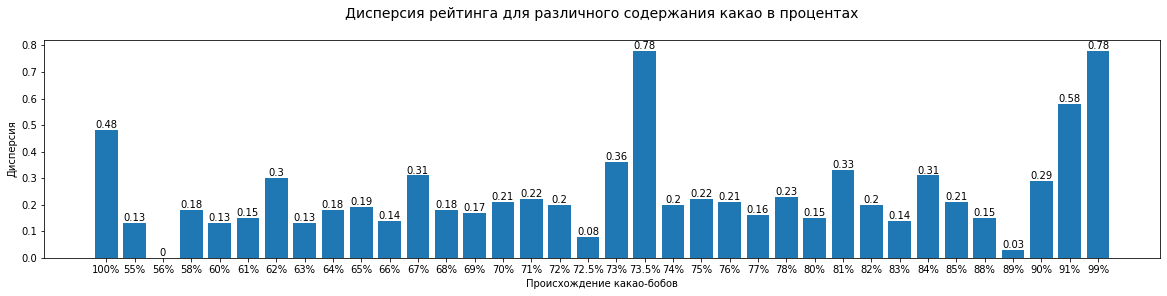

In [857]:
cocoa_grouped_rating = df.groupby("Cocoa Percent")["Rating"]
cocoa_basis_var = cocoa_grouped_rating.var().dropna().round(2)

plt.figure(figsize=(20, 4))
plt.title('Дисперсия рейтинга для различного содержания какао в процентах\n', fontsize=14)
plt.xlabel('Происхождение какао-бобов')
plt.ylabel('Дисперсия')
plt.bar_label(plt.bar(cocoa_basis_var.index, cocoa_basis_var.values));

*__Этап 2.__ Рассчитаем размах рейтинга (Rating) для различного содержания какао в процентах (Cocoa Percent)*

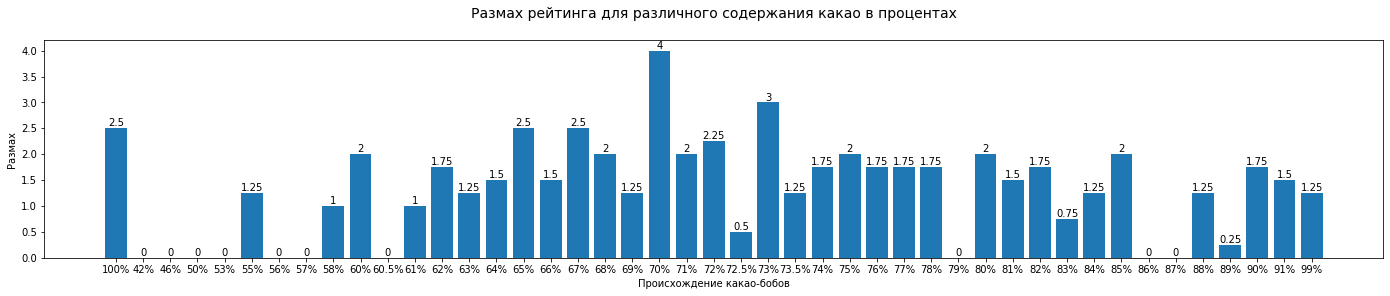

In [858]:
cocoa_basis_minmax = (cocoa_grouped_rating.max() - cocoa_grouped_rating.min()).dropna().round(2)

plt.figure(figsize=(24, 4))
plt.title('Размах рейтинга для различного содержания какао в процентах\n', fontsize=14)
plt.xlabel('Происхождение какао-бобов')
plt.ylabel('Размах')
plt.bar_label(plt.bar(cocoa_basis_minmax.index, cocoa_basis_minmax.values));